In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from src.models.cnn_ae import CNNAE
from src.data.data_module import SliderDataModule
import pytorch_lightning as pl

model = CNNAE(shape_preflatten=(64, 14, 3), z_dim=1024)
dm = SliderDataModule(
    data_dir="../data/raw",
    batch_size=128,
    num_workers=8,
    normalize=False,
    maxlen=312,
    use_cnn=True,
    iter_over_cols=False
)
early_stopping = pl.callbacks.EarlyStopping('val/loss', patience=10)
callbacks = [early_stopping]
trainer = pl.Trainer(accelerator="gpu", devices=1,
                    callbacks=callbacks, max_epochs=200,
                    log_every_n_steps=1)
trainer.fit(model, datamodule=dm)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 3.0 M 
1 | decoder | Decoder | 3.0 M 
2 | loss_fn | MSELoss | 0     
------------------------------------
6.1 M     Trainable params
0         Non-trainable params
6.1 M     Total params
24.390    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe922ffa820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1405, in __del__
    self._shutdown_workers()Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe922ffa820>
Traceback (most recent call last):

  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1405, in __del__
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1388, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe922ffa820>    if w.is_alive():Exception ignored in: 
self._shutdown_workers()Traceback (most recent call last):

  File "/opt/conda/lib/python3.8/multiprocessing/process.py", line 160, in is_alive

<function _MultiProcessingDataLoaderIter.__del__ at 0x7fe922ffa820>  File "/opt/conda/lib/python3.8/site-packages/torch/util

Validation: 0it [00:00, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe922ffa820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1405, in __del__
    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fe922ffa820>  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1388, in _shutdown_workers

    Traceback (most recent call last):
if w.is_alive():
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1405, in __del__
  File "/opt/conda/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
        self._shutdown_workers()assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1388, in _shutdown_workers

AssertionError    : if w.is_alive():can only test a child process
  File "/opt/cond

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [39]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

from src.data.dataset import SliderDataset

n_mels = 128
frames = 5
n_fft = 1024
hop_length = 512
power = 2.0

ds = SliderDataset("../data/raw/dev_data/dev_data/slider/test/",
                n_mels=n_mels,
                frames=frames,
                n_fft=n_fft,
                hop_length=hop_length,
                power=power,
                normalize=False,
                maxlen=312,
                use_cnn=True,
                iter_over_cols=False
)

sample = ds[10]
sample

{'label': 'anomaly',
 'machine_id': '00',
 'audio_id': '00000010',
 'path': '../data/raw/dev_data/dev_data/slider/test/anomaly_id_00_00000010.wav',
 'input': tensor([[[  0.9236,   4.4635,   2.7000,  ..., -29.0349, -32.8163, -29.7290],
          [ -1.9994,   0.6906,   1.3040,  ..., -27.3513, -28.9089, -30.8649],
          [  1.3300,   4.6262,  -0.8224,  ..., -28.1779, -29.2592, -31.2723],
          ...,
          [  5.3901,   6.6415,   4.5505,  ..., -12.0379, -12.6734, -15.4756],
          [ -0.8221,   2.8199,  -0.4025,  ..., -13.7797, -13.8975, -17.3029],
          [ -3.2309,  -9.9509,  -2.3087,  ...,  -7.7907, -10.0060, -12.7440]]])}

tensor(30.3323)


<AxesSubplot:>

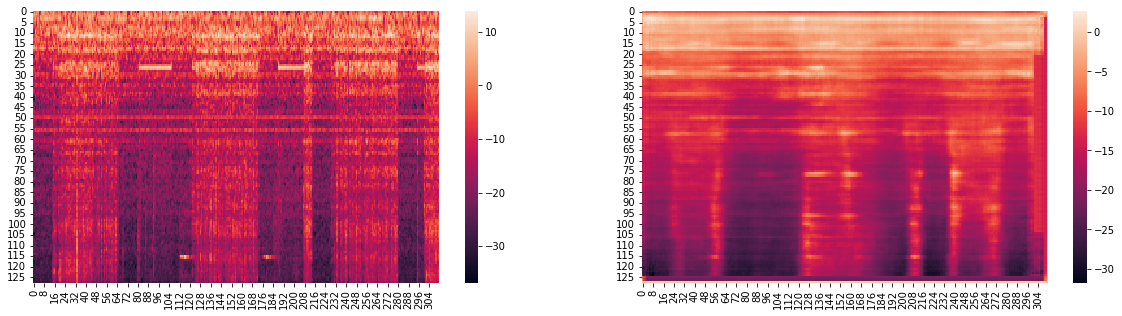

In [40]:
x_test = sample['input'].unsqueeze(0)
with torch.no_grad():
    x_recon = model(x_test)
    x_test = x_test.squeeze()
    x_recon = x_recon.squeeze()
    print(nn.MSELoss()(x_test, x_recon))
idx = 20
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.heatmap(x_test.cpu().T, ax=axs[0])
sns.heatmap(x_recon.cpu().T, ax=axs[1])

In [47]:
model = model.cuda()

In [79]:
dm = SliderDataModule(
    data_dir="../data/raw",
    batch_size=128,
    num_workers=8,
    normalize=False,
    maxlen=312,
    use_cnn=True,
    iter_over_cols=False
)
test_loader = dm.test_dataloader()
predict_loader = dm.predict_dataloader()

In [62]:
import numpy as np
from tqdm import tqdm

y_pred = []
y_test = []
mse = nn.MSELoss(reduction="none")
for batch in tqdm(test_loader):
    x_test = batch['input'].cuda()
    labels = np.array(batch['label'])
    y_test.append(np.where(labels == "anomaly", 1, 0))
    with torch.no_grad():
        x_recon = model(x_test)
        y_pred.append(mse(x_recon, x_test).mean(dim=(1,2,3)))

100%|██████████| 9/9 [00:03<00:00,  2.39it/s]


In [69]:
y_pred = torch.cat(y_pred).cpu().numpy()

In [74]:
y_test = np.concatenate(y_test)

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, max_fpr=0.1)

0.6858313073570318

In [85]:
import os

y_pred = []
y_test = []
fnames = []
mse = nn.MSELoss(reduction="none")
for batch in tqdm(predict_loader):
    x_test = batch['input'].cuda()
    labels = np.array(batch['label'])
    y_test.append(np.where(labels == "anomaly", 1, 0))
    fnames.extend([os.path.basename(n) for n in batch["path"]])
    with torch.no_grad():
        x_recon = model(x_test)
        y_pred.append(mse(x_recon, x_test).mean(dim=(1,2,3)))
y_pred = torch.cat(y_pred).cpu().numpy()

100%|██████████| 7/7 [00:04<00:00,  1.52it/s]


In [86]:
import pandas as pd

df = pd.DataFrame({"file_name": fnames, "anomaly_score": y_pred})
df

,file_name,anomaly_score
0,id_01_00000000.wav,23.180538
1,id_01_00000001.wav,17.933529
2,id_01_00000002.wav,24.778660
3,id_01_00000003.wav,17.820473
4,id_01_00000004.wav,23.825981
...,...,...
829,id_05_00000273.wav,19.333549
830,id_05_00000274.wav,20.546436
831,id_05_00000275.wav,19.724346
832,id_05_00000276.wav,19.242035


In [87]:
df.to_csv("submission.csv", index=False)

In [91]:
!mkdir -p ~/.kaggle
!echo '{"username":"minhduc0711","key":"98f75e2eccf6861a19dd0459c34910d9"}' >> ~/.kaggle/kaggle.json

In [92]:
!kaggle competitions submit -c eurecom-aml-2022-challenge-2 -f submission.csv -m "cnn-based autoencoder"

100%|██████████████████████████████████████| 23.5k/23.5k [00:00<00:00, 47.2kB/s]
Successfully submitted to EURECOM AML 2022:: Challenge 2